# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [4]:
%matplotlib inline

In [5]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [6]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Q1: Is the distribution of body temperatures normal?
    

(array([0.05128205, 0.07692308, 0.12820513, 0.23076923, 0.23076923,
        0.58974359, 0.46153846, 0.56410256, 0.51282051, 0.28205128,
        0.12820513, 0.        , 0.05128205, 0.        , 0.02564103]),
 array([ 96.3,  96.6,  96.9,  97.2,  97.5,  97.8,  98.1,  98.4,  98.7,
         99. ,  99.3,  99.6,  99.9, 100.2, 100.5, 100.8]),
 <a list of 15 Patch objects>)

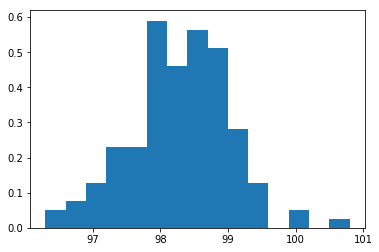

In [16]:
import matplotlib.pyplot as plt
plt.hist(df['temperature'],bins=15,density=True)

In [22]:
import numpy as np

temp=df['temperature'].values


In [23]:
# define a emperical cumulative distribution function

def ecdf (data):
    '''this function defines an emperical cumulative distribution function'''
    
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    
    return x,y
    

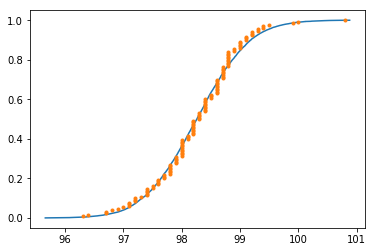

In [24]:
# simulate a normal distribution and compare the CDF of the simulation vs the real sample we have

sim=np.random.normal(np.mean(temp),np.std(temp),10000)

x,y= ecdf(temp)
x_theor,y_theor=ecdf(sim)

plt.plot(x_theor,y_theor)
plt.plot(x,y,marker='.',linestyle='none')
plt.show()


We see that the sample fit closely to the theorical normal distribution. Therefore the body temp follows normal distribution.

### Q2: Is the sample size large? Are the observations independent?

In [25]:
df.count()

temperature    130
gender         130
heart_rate     130
dtype: int64

130 is good sample size (from central limit theorem, usually sample size >30, the sampling distribution of sample mean is normally distributed). Since 130 is tiny fraction of the whole human population we can consider the samples are independent.

### Q3: Is the true population mean really 98.6 degrees F?
    *First, try a bootstrap hypothesis test.
    *Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    *In this situation, is it appropriate to use the  t  or  z  statistic?
    *Now try using the other test. How is the result be different? Why?

In [50]:
# define a function which draws bootstrap replicas

def bs_replica(data,func,sample_size=1):
    '''Draw 1 bootstrap replica'''
    
    return func(np.random.choice(data,size=sample_size))

def draw_bs_replicas(data,func,size=1,sample_size=1):
    '''Draw bootstrap replicas'''
    
    replicas=np.empty(size)
    
    for i in range(size):
        replicas[i]=bs_replica(data,func,sample_size)
    
    return replicas


sample mean is  98.24923076923075


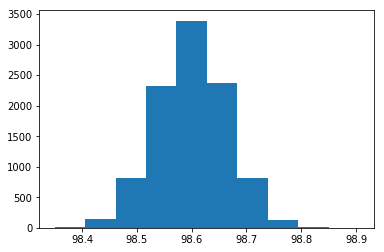

In [51]:
# null hypothesis: true population mean is 98.6F

temp_mean=np.mean(temp)
print('sample mean is ',temp_mean)
temp_shifted=temp-temp_mean+98.6
temp_reps=draw_bs_replicas(temp_shifted,np.mean,size=10000,sample_size=len(temp_shifted))
plt.hist(temp_reps)
plt.show()



In [52]:
p=np.sum(temp_reps<=temp_mean)/len(temp_reps)
p

0.0

We can reject the null hypothesis given that p-value is so low. 

Alternatively we can also compute confidence level. 
Since the sample size is larger than 30, we should use z-statistics. I assume 5% confidence interval.

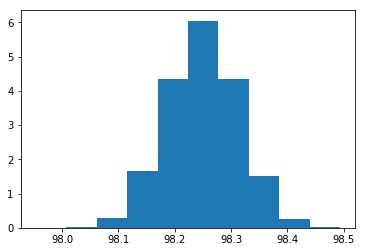

In [53]:
temp_fre_reps=draw_bs_replicas(temp,np.mean,size=10000,sample_size=len(temp))
plt.hist(temp_fre_reps,density=True)
plt.show()

In [54]:
np.percentile(temp_fre_reps,[2.5,97.5])

array([98.12307692, 98.37384615])

Since 98.6 is not in this confidence interval, we can say that it's unlikely mean is 98.6

In [55]:
# use the z table to calculate it and we get similar result as we get from simulation

mean=np.mean(temp)
se=np.std(temp)/np.sqrt(130)
z=1.96
[mean-z*se,mean+z*se]

[98.12367980442816, 98.37478173403333]

### Q4:Draw a small sample of size 10 from the data and repeat both frequentist tests.

    Which one is the correct one to use?
    What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

In [62]:
sample=np.random.choice(temp,10)
mean=np.mean(sample)
se=np.std(sample)/np.sqrt(10)
# if we were to use z 
z=1.96
[mean-z*se,mean+z*se]

[98.30480407833734, 98.79519592166265]

In [63]:
#If we were to use t
t=2.262
[mean-t*se,mean+t*se]

[98.26702389040769, 98.83297610959231]

(array([0.02294118, 0.16470588, 0.60294118, 1.37352941, 1.66      ,
        1.32117647, 0.55176471, 0.15941176, 0.02352941, 0.00235294]),
 array([97.49, 97.66, 97.83, 98.  , 98.17, 98.34, 98.51, 98.68, 98.85,
        99.02, 99.19]),
 <a list of 10 Patch objects>)

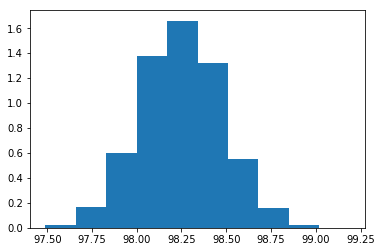

In [64]:
# next compare it with simulation

samples=draw_bs_replicas(temp,np.mean,size=10000,sample_size=10)
plt.hist(samples,density=True)

In [65]:
np.percentile(samples,[2.5,97.5])

array([97.8, 98.7])